In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
train_url = "C:/Users/kamyar.manshaei/Desktop/Kaggle/Google Competition/train3.csv"
train = pd.read_csv(train_url)
test_url = "C:/Users/kamyar.manshaei/Desktop/Kaggle/Google Competition/test3.csv"
test = pd.read_csv(test_url)

--------------------------------------

# <font color='red'>Numeric and Categorical columns

In [3]:
numerics = train._get_numeric_data().columns.values.tolist()
categoricals = [col for col in train.columns.values if col not in numerics]

print('numeric columns:')
print(numerics)
print()
print('categorical columns:')
print(categoricals)

numeric columns:
['isMobile', 'hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue', 'isTrueDirect', 'isVideoAd', 'visitNumber', 'year', 'month', 'day', 'weekday', 'startHour']

categorical columns:
['browser', 'operatingSystem', 'deviceCategory', 'continent', 'subContinent', 'country', 'region', 'metro', 'city', 'networkDomain', 'campaign', 'source', 'medium', 'keyword', 'referralPath', 'channelGrouping', 'sessionId']


--------------------------------------

# <font color='red'> A deeper look into numerics

Some numeric variables with small number of unique values are in fact categorical and must be converted to categorical variables, but at first, let's take a look again into all numerics:

In [4]:
for cat in numerics:
    print(cat)
    print(train[cat].describe())
    print()

isMobile
count    902755.000000
mean          0.264622
std           0.441132
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: isMobile, dtype: float64

hits
count    902755.000000
mean          4.591720
std           9.634079
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         500.000000
Name: hits, dtype: float64

pageviews
count    902755.000000
mean          3.846008
std           7.019751
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max         469.000000
Name: pageviews, dtype: float64

bounces
count    902755.000000
mean          0.498892
std           0.499999
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: bounces, dtype: float64

newVisits
count    902755.000000
mean          0.778101
std           0.415523
min           0.000000
25%   

*weekday* is in fact categorical:

In [5]:
train["weekday"][train["weekday"] == 0] = 'Monday'
train["weekday"][train["weekday"] == 1] = 'Tuesday'
train["weekday"][train["weekday"] == 2] = 'Wednesday'
train["weekday"][train["weekday"] == 3] = 'Thursday'
train["weekday"][train["weekday"] == 4] = 'Friday'
train["weekday"][train["weekday"] == 5] = 'Saturday'
train["weekday"][train["weekday"] == 6] = 'Sunday'

test["weekday"][test["weekday"] == 0] = 'Monday'
test["weekday"][test["weekday"] == 1] = 'Tuesday'
test["weekday"][test["weekday"] == 2] = 'Wednesday'
test["weekday"][test["weekday"] == 3] = 'Thursday'
test["weekday"][test["weekday"] == 4] = 'Friday'
test["weekday"][test["weekday"] == 5] = 'Saturday'
test["weekday"][test["weekday"] == 6] = 'Sunday'

numerics.remove('weekday')
categoricals.append('weekday')

The *startHour* can be converted to a categorical variable as well. We only need to keep in which part of the day the transaction was started. Therefore we remove this variable and make a new variable *partOfDay*:

In [6]:
train["partOfDay"] = float('NaN')
train["partOfDay"].loc[(0 <= train["startHour"]) & (train["startHour"] < 6)] = 'Midnight'
train["partOfDay"].loc[ (6 <= train["startHour"]) & (train["startHour"] < 9)] = 'Early morning'
train["partOfDay"].loc[(9 <= train["startHour"]) & (train["startHour"] < 12)] = 'Morning'
train["partOfDay"].loc[(12 <= train["startHour"]) & (train["startHour"] < 17)] = 'Afternoon'
train["partOfDay"].loc[(17 <= train["startHour"]) & (train["startHour"] < 21)] = 'Evening'
train["partOfDay"].loc[(21 <= train["startHour"]) & (train["startHour"] < 24)] = 'Night'

test["partOfDay"] = float('NaN')
test["partOfDay"].loc[(0 <= test["startHour"]) & (test["startHour"] < 6)] = 'Midnight'
test["partOfDay"].loc[ (6 <= test["startHour"]) & (test["startHour"] < 9)] = 'Early morning'
test["partOfDay"].loc[(9 <= test["startHour"]) & (test["startHour"] < 12)] = 'Morning'
test["partOfDay"].loc[(12 <= test["startHour"]) & (test["startHour"] < 17)] = 'Afternoon'
test["partOfDay"].loc[(17 <= test["startHour"]) & (test["startHour"] < 21)] = 'Evening'
test["partOfDay"].loc[(21 <= test["startHour"]) & (test["startHour"] < 24)] = 'Night'

In [7]:
train.drop('startHour',axis=1, inplace=True)
test.drop('startHour',axis=1, inplace=True)

categoricals.append('partOfDay')
numerics.remove('startHour')

--------------------------------------

# <font color='red'> A deeper look into categoricals

We can also shorten some categorical features with a large number of features. For example, we can split all values of the column *day* into *beginning*, *middle*, *end* periods. Or we can extract the domain suffixes from the variable *networkDomai*, which also contains a large number of unique values.  

Here we integrate two different values of some columns in one value, since they are both the same:

### <font color='blue'> Combining all not available values

In [8]:
for col in categoricals:
    train[col][train[col] == "(not set)"] = "not available"
    train[col][train[col] == "not available in demo dataset"] = "not available"
    test[col][test[col] == "(not set)"] = "not available"
    test[col][test[col] == "not available in demo dataset"] = "not available"

### <font color='blue'>*networkDomain*

Here we only extract top level domain suffix, and assign all different forms of unknowns to one category. the rest of values will be assigned to *others* category. But at first just a brief look into the frequency of each domain suffix:

In [9]:
print(".com: ",len(train['networkDomain'][train['networkDomain'].str.contains(".com")]))
print(".org: ",len(train['networkDomain'][train['networkDomain'].str.contains(".org")]))
print(".net: ",len(train['networkDomain'][train['networkDomain'].str.contains(".net")]))
print(".edu: ",len(train['networkDomain'][train['networkDomain'].str.contains(".edu")]))
print(".gov: ",len(train['networkDomain'][train['networkDomain'].str.contains(".gov")]))
print(".mil: ",len(train['networkDomain'][train['networkDomain'].str.contains(".mil")]))
print("unknown: ",len(train['networkDomain'][train['networkDomain'].str.contains("unknown")]))

.com:  141668
.org:  3724
.net:  256539
.edu:  10939
.gov:  959
.mil:  1078
unknown:  146086


As we already have a column called *country*, we only keep the domain suffix (TO BE CHECKED). <br>It's important to notice that __str.contains__ method checks for the substring in any orders, hence if we have e.g. the substing *common* in one of the domains, it would be counted as *.com* domain. (TO BE FIXED)

Just to know how many different domain suffixes, with a frequency of higher than 500, we have:

In [10]:
from collections import Counter
value_counter = Counter(train["networkDomain"].tolist())
len({x : value_counter[x] for x in value_counter if value_counter[x] >= 500})

142

Now the assignment:

In [11]:
train['domain'] = 'others'
train['domain'][train['networkDomain'].str.contains("unknown")] = "unknown"
train['domain'][train['networkDomain'].str.contains(".com")] = ".com"
train['domain'][train['networkDomain'].str.contains(".org")] = ".org"
train['domain'][train['networkDomain'].str.contains(".net")] = ".net"
train['domain'][train['networkDomain'].str.contains(".edu")] = ".edu"
train['domain'][train['networkDomain'].str.contains(".gov")] = ".gov"
train['domain'][train['networkDomain'].str.contains(".mil")] = ".mil"

test['domain'] = 'others'
test['domain'][test['networkDomain'].str.contains("unknown")] = "unknown"
test['domain'][test['networkDomain'].str.contains(".com")] = ".com"
test['domain'][test['networkDomain'].str.contains(".org")] = ".org"
test['domain'][test['networkDomain'].str.contains(".net")] = ".net"
test['domain'][test['networkDomain'].str.contains(".edu")] = ".edu"
test['domain'][test['networkDomain'].str.contains(".gov")] = ".gov"
test['domain'][test['networkDomain'].str.contains(".mil")] = ".mil"

In [12]:
train.drop('networkDomain',axis=1, inplace=True)
test.drop('networkDomain',axis=1, inplace=True)

categoricals.append('domain')
categoricals.remove('networkDomain')

### <font color='blue'>*keyword*, *source* and *referralPath*

These three variables have a high number of unique values, but it seems that they are strongly associated with each other:

In [13]:
train[['source', 'keyword', 'referralPath']]
#train[['source', 'keyword', 'referralPath']][train['source'].str.contains('yahoo')]

,source,keyword,referralPath
0,google,(not provided),/
1,google,(not provided),/
2,google,(not provided),/
3,google,google + online,/
4,google,(not provided),/
5,google,(not provided),/
6,google,(not provided),/
7,google,(not provided),/
8,google,(not provided),/
9,google,(not provided),/


For example, everywhere the *source* is equal to __(direct)__, *keyword* is not provided and *referralPath* is __/__:

In [14]:
print(train['referralPath'][train['source'] == '(direct)'].unique())
print(train['keyword'][train['source'] == '(direct)'].unique())

['/']
['(not provided)']


Since it seems that *source* is the most important one, we take a look into this variable:

In [15]:
value_counter = Counter(train["source"].tolist())
{x : value_counter[x] for x in value_counter if value_counter[x] >= 500}

{'(direct)': 142858,
 'Partners': 16380,
 'analytics.google.com': 16131,
 'baidu': 3351,
 'bing': 1527,
 'blog.golang.org': 741,
 'dealspotr.com': 528,
 'dfa': 5683,
 'facebook.com': 2292,
 'gdeals.googleplex.com': 1063,
 'google': 400340,
 'google.com': 4659,
 'groups.google.com': 1025,
 'l.facebook.com': 792,
 'm.facebook.com': 3360,
 'mail.google.com': 1456,
 'mall.googleplex.com': 66343,
 'plus.google.com': 524,
 'qiita.com': 1811,
 'quora.com': 1545,
 'reddit.com': 2019,
 'siliconvalley.about.com': 2095,
 'sites.google.com': 2983,
 't.co': 1529,
 'yahoo': 1477,
 'youtube.com': 212521}

Now we try to combine some values of *source*:

In [16]:
train['cleanedSource'] = train['source']
train['cleanedSource'][train['source'].str.contains('google')]  = 'google'
train['cleanedSource'][train['source'].str.contains('yahoo')]  = 'yahoo'
train['cleanedSource'][train['source'].str.contains('facebook')]  = 'facebook'
train['cleanedSource'][train['source'].str.contains('youtube')]  = 'youtube'

test['cleanedSource'] = test['source']
test['cleanedSource'][test['source'].str.contains('google')]  = 'google'
test['cleanedSource'][test['source'].str.contains('yahoo')]  = 'yahoo'
test['cleanedSource'][test['source'].str.contains('facebook')]  = 'facebook'
test['cleanedSource'][test['source'].str.contains('youtube')]  = 'youtube'

Here if one value is contained in another one, the value of the larger will be set to the shorter:

In [17]:
from difflib import SequenceMatcher
import itertools

values = train["cleanedSource"].unique().tolist()
values.remove('t.co')
for a, b in itertools.combinations(values, 2):
    if(a in b) or (b in a):
        if len(a) < len(b):
            train['cleanedSource'][train['cleanedSource'] == b]  = a
            test['cleanedSource'][test['cleanedSource'] == b]  = a
        else:
            train['cleanedSource'][train['cleanedSource'] == a]  = b
            test['cleanedSource'][test['cleanedSource'] == a]  = b

And finally all values which are repeated only once will be set to __other__:

In [18]:
train['cleanedSource'][train.groupby('cleanedSource').cleanedSource.transform(len) == 1] = 'other'
train['source'] = train['cleanedSource']
train.drop('cleanedSource',axis=1, inplace=True)

test['cleanedSource'][test.groupby('cleanedSource').cleanedSource.transform(len) == 1] = 'other'
test['source'] = test['cleanedSource']
test.drop('cleanedSource',axis=1, inplace=True)

As all these three columns look similar, we only keep *source* and remove the other two:

In [19]:
train.drop('referralPath',axis=1, inplace=True)
train.drop('keyword',axis=1, inplace=True)
test.drop('referralPath',axis=1, inplace=True)
test.drop('keyword',axis=1, inplace=True)
categoricals.remove('keyword')
categoricals.remove('referralPath')

### <font color='blue'>*medium*

In [20]:
print('(none): ', len(train[train['medium'] == '(none)']))
print('not available: ', len(train[train['medium'] == 'not available']))

(none):  142856
not available:  120


In [21]:
train['medium'][train['medium'] == 'not available'] = '(none)'
test['medium'][test['medium'] == 'not available'] = '(none)'

### <font color='blue'>*browser*

For this column we need to combine some values, which are in fact the same. At first let's check those values:

In [22]:
Counter(train['browser'].tolist())

Counter({'0': 7,
         'ADM': 1,
         'Amazon Silk': 561,
         'Android Browser': 552,
         'Android Runtime': 2,
         'Android Webview': 7855,
         'Apple-iPhone7C2': 9,
         'BlackBerry': 184,
         'CSM Click': 1,
         'Changa 99695759': 1,
         'Chrome': 619699,
         'Coc Coc': 724,
         'DASH_JR_3G': 4,
         'DoCoMo': 1,
         'Edge': 10197,
         'Firefox': 37039,
         'HTC802t_TD': 1,
         'Hisense M20-M_LTE': 1,
         'IE with Chrome Frame': 1,
         'Internet Explorer': 19358,
         'Iron': 33,
         'Konqueror': 1,
         'LYF_LS_4002_11': 3,
         'LYF_LS_4002_12': 21,
         'Lunascape': 5,
         'M5': 1,
         'MQQBrowser': 2,
         'MRCHROME': 263,
         'Maxthon': 246,
         'Mozilla': 11,
         'Mozilla Compatible Agent': 374,
         'Nichrome': 7,
         'Nintendo Browser': 140,
         'Nokia Browser': 67,
         'NokiaE52-1': 2,
         'Opera': 5640,
        

Now combining them:

In [23]:
train['browser'][train['browser'].str.contains('Safari')] = 'Safari'
train['browser'][train['browser'].str.contains('Android')] = 'Android'
train['browser'][train['browser'].str.contains('Mozilla')] = 'Mozilla'
train['browser'][train['browser'].str.contains('Nokia')] = 'Nokia'
train['browser'][train['browser'].str.contains('Safari')] = 'Safari'
train['browser'][train['browser'].str.contains('Opera')] = 'Opera'
train['browser'][train.groupby('browser').browser.transform(len) < 69] = 'other'

test['browser'][test['browser'].str.contains('Safari')] = 'Safari'
test['browser'][test['browser'].str.contains('Android')] = 'Android'
test['browser'][test['browser'].str.contains('Mozilla')] = 'Mozilla'
test['browser'][test['browser'].str.contains('Nokia')] = 'Nokia'
test['browser'][test['browser'].str.contains('Safari')] = 'Safari'
test['browser'][test['browser'].str.contains('Opera')] = 'Opera'
test['browser'][test.groupby('browser').browser.transform(len) < 30] = 'other'

# <font color='red'> Charts

### <font color='blue'>Bar charts of categoricals 

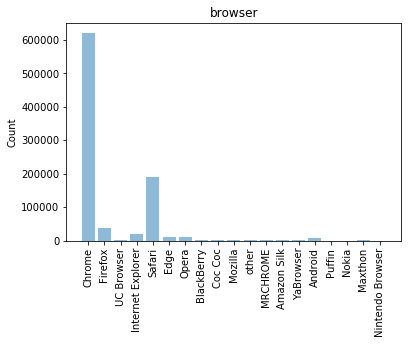

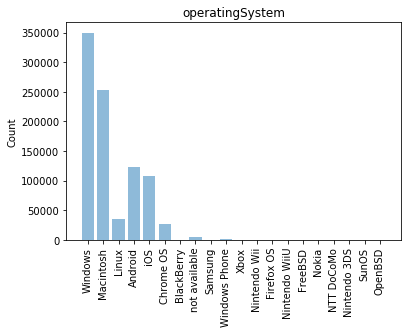

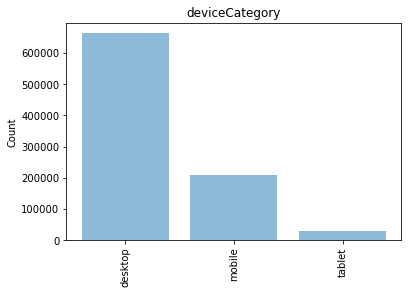

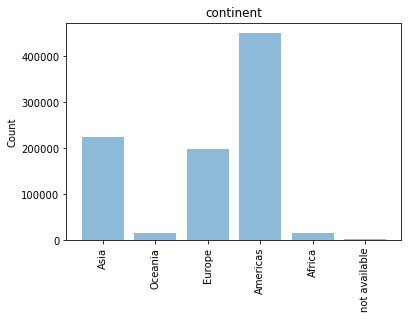

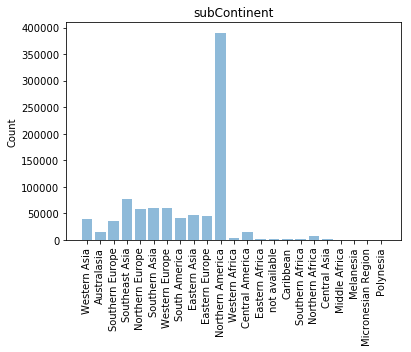

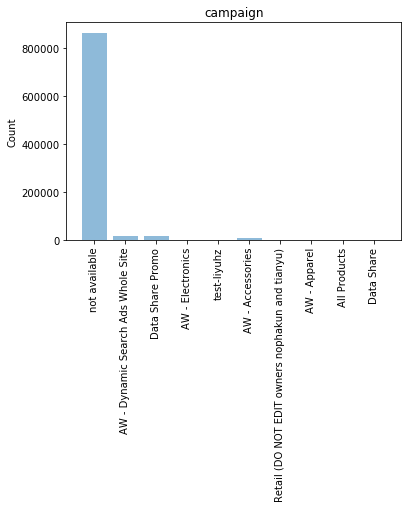

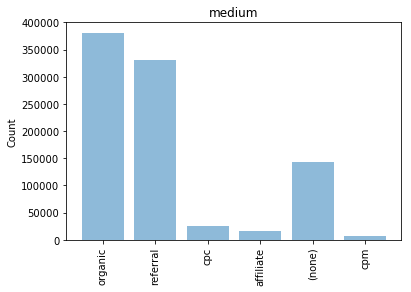

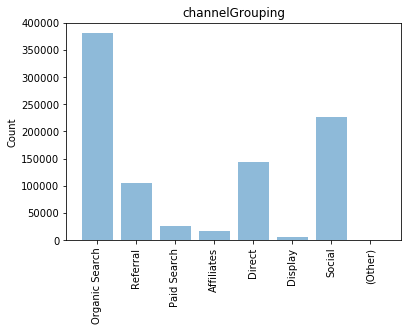

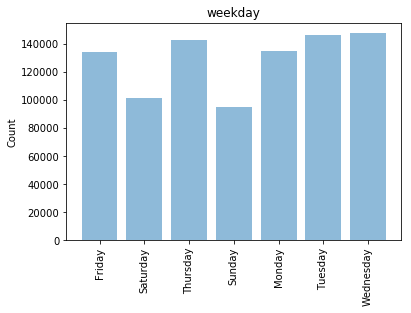

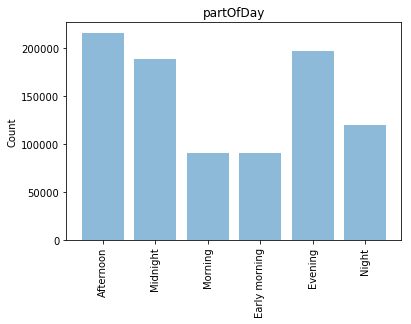

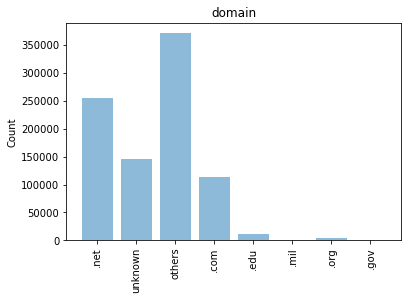


country
222

region
375

metro
93

city
648

source
94

sessionId
902755


In [24]:
long = []
for col in categoricals:
    if(len(train[col].unique()) < 50):
        x = train[col].unique()
        y = [len(train[col][train[col] == value]) for value in train[col].unique()]
        x_pos = np.arange(len(x))

        plt.bar(x_pos, y, align='center', alpha=0.5)
        plt.xticks(x_pos, x, rotation='vertical')
        plt.ylabel('Count')
        plt.title(col)
        plt.show()
    else:
        long.append(col)

for col in long:
    print()
    print(col)
    print(len(train[col].unique()))

### <font color='blue'>Histograms of numerics

isMobile


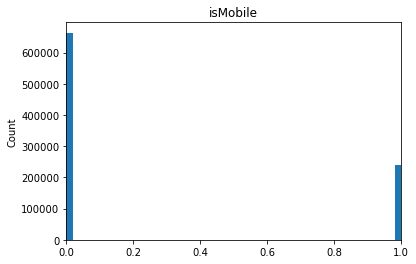

hits


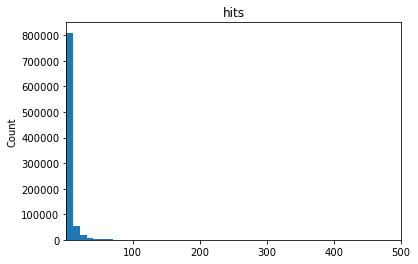

pageviews


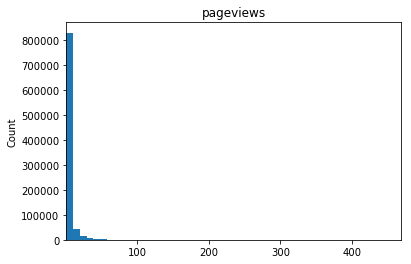

bounces


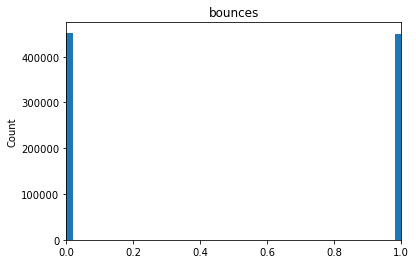

newVisits


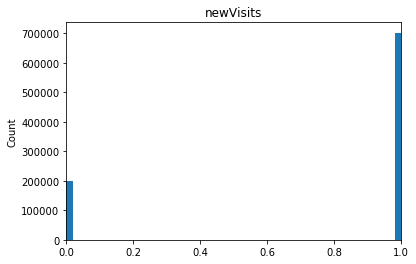

transactionRevenue


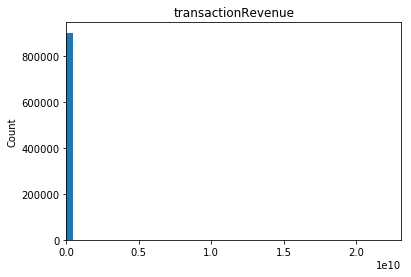

isTrueDirect


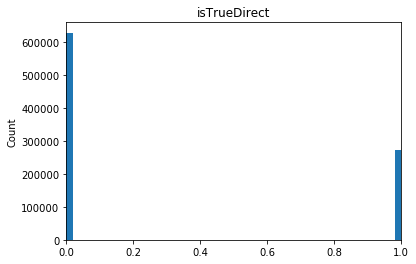

isVideoAd


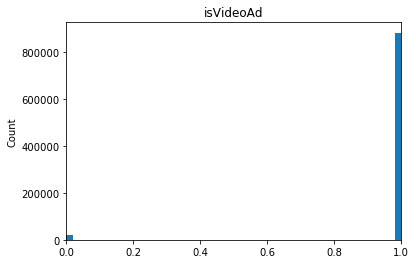

visitNumber


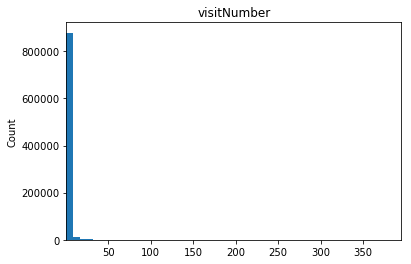

year


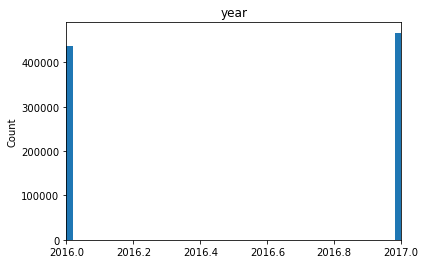

month


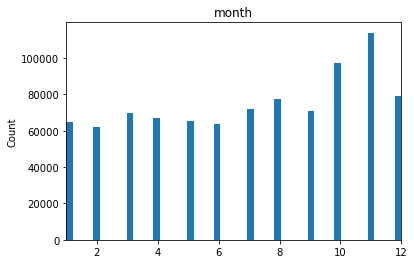

day


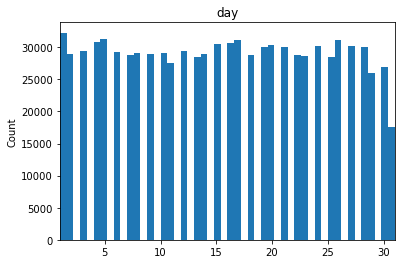

In [25]:
for col in numerics:
    print(col)
    x = train[col]#.dropna()
    plt.hist(x, bins = 50)
    plt.ylabel('Count')
    plt.title(col)
    plt.xlim(xmin= min(train[col].unique()) , xmax = max(train[col].unique()))
    plt.show()

From the histograms, we can infere that some columns may contain outliers. (TO BE CHECKED)

------------------------------------

# <font color='red'> Writing the final dataframe to .csv

In [26]:
train.to_csv('train4.csv', index=False, encoding='utf-8')
test.to_csv('test4.csv', index=False, encoding='utf-8')